In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose


## Load the data

In [20]:
## Load the data (choose the data set you want to practice on)

## Solar radiance
data = pd.read_csv('../data/time_series_solar.csv', index_col="Datetime", parse_dates=True) 

## Airline passengers
#data = pd.read_csv('../data/airline-passengers.csv', index_col="Month", parse_dates=True)

## CO2
#data = pd.read_csv('../data/co2_data.csv', parse_dates=True)

## Hourly Energy Consumption 
#data = pd.read_csv('../data/AEP_hourly.csv',index_col="Datetime", parse_dates=True)
#data = data.iloc[0:1000]

In [21]:
data

,Incoming Solar
Datetime,
2007-10-01 00:00:00,0.0
2007-10-01 01:00:00,0.0
2007-10-01 02:00:00,0.0
2007-10-01 03:00:00,0.0
2007-10-01 04:00:00,0.0
...,...
2013-09-30 19:00:00,0.0
2013-09-30 20:00:00,0.0
2013-09-30 21:00:00,0.0


## We will do the analysis on solar radiance data set.

In [22]:
data.columns = ['value']

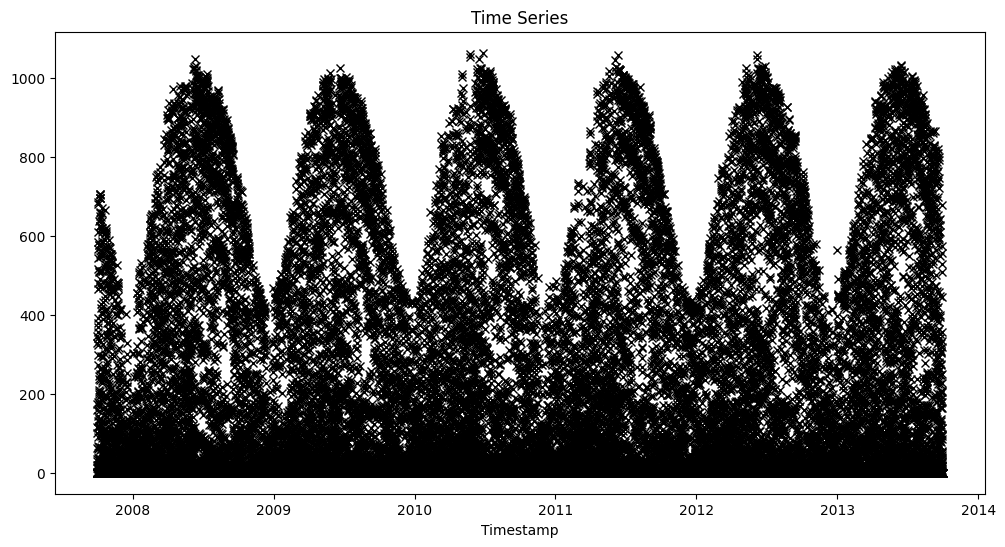

In [23]:
# Basic plot
plt.figure(figsize=(12, 6))
plt.plot(data['value'], 'kx')
plt.title("Time Series")
plt.xlabel("Timestamp")
plt.ylabel("")
plt.show()

## We will resample the data to daily frequency

In [24]:
data = data.resample('D').sum()

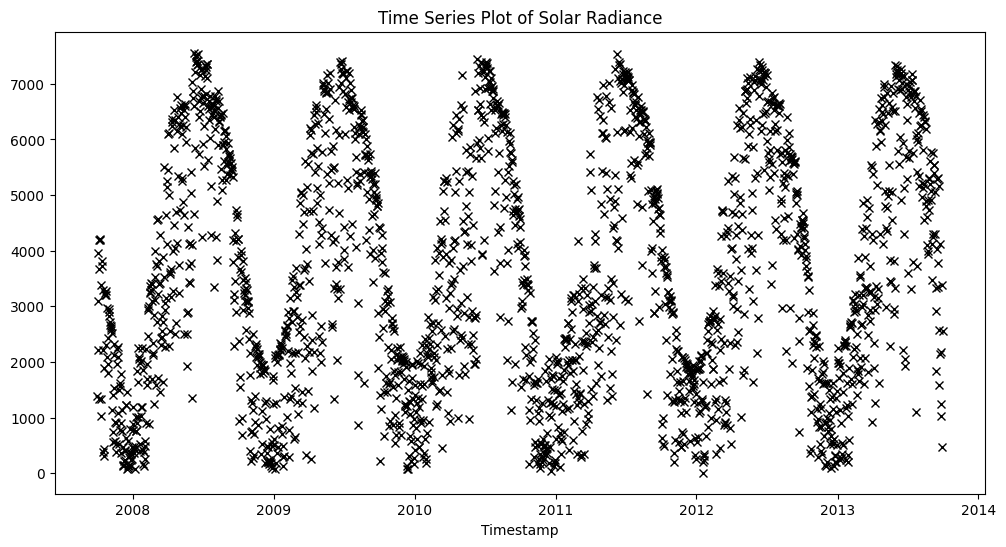

In [25]:
# Basic plot
plt.figure(figsize=(12, 6))
plt.plot(data['value'],'kx')
plt.title("Time Series Plot of Solar Radiance")
plt.xlabel("Timestamp")
plt.ylabel("")
plt.show()

### Let's compute statistics to understand the data better

In [26]:
print("Mean:", data['value'].mean())
print("Standard Deviation:", data['value'].std())
print("Skewness:", data['value'].skew())
print("Kurtosis:", data['value'].kurt())

Mean: 3594.8110401459853
Standard Deviation: 2165.4280624346693
Skewness: 0.1513463562667873
Kurtosis: -1.2527843893633406


## Identifying possible issues

## Missing values

# Generate example of data with missing values

In [27]:
series = data['value'].resample('D').sum()

sample_with_nan = series.head(365 * 2).copy()

size_na = int(0.6 * len(sample_with_nan))

idx = np.random.choice(a=range(len(sample_with_nan)),
                       size=size_na,
                       replace=False)

# New series based on solar radiance with missing values
sample_with_nan[idx] = np.nan

/var/folders/pn/vpqz4z_53xl4fpq_28c5mx700000gn/T/ipykernel_34547/3358980458.py:12: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  sample_with_nan[idx] = np.nan


In [28]:
df_sample_with_nan = pd.DataFrame(sample_with_nan)

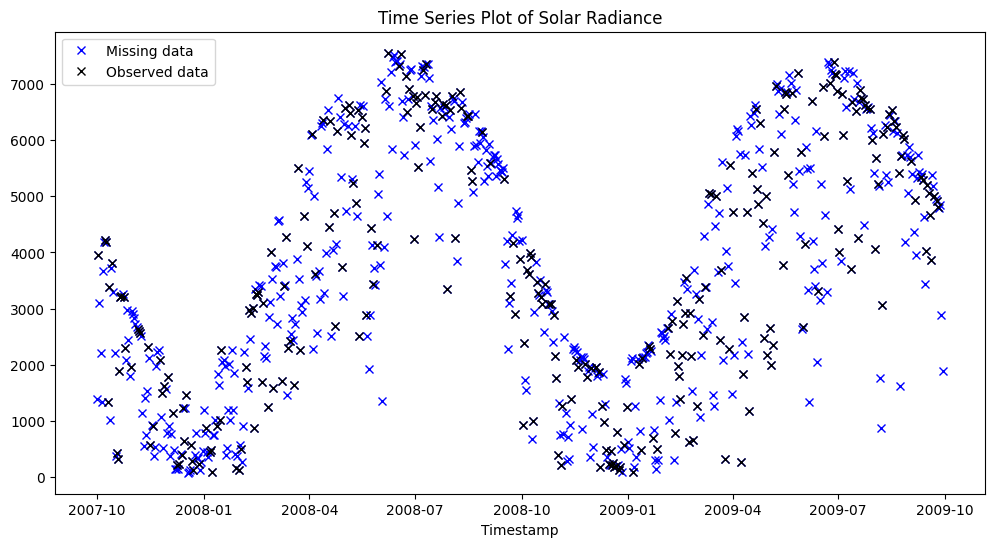

In [29]:
# Basic plot
plt.figure(figsize=(12, 6))
plt.plot(series.head(365 * 2),'bx', label='Missing data')
plt.plot(df_sample_with_nan['value'],'kx', label='Observed data')
plt.title("Time Series Plot of Solar Radiance")
plt.xlabel("Timestamp")
plt.ylabel("")
plt.legend()
plt.savefig("figures/Solar_Missing_example.png")
plt.show()

Missing Values:
 value    438
dtype: int64


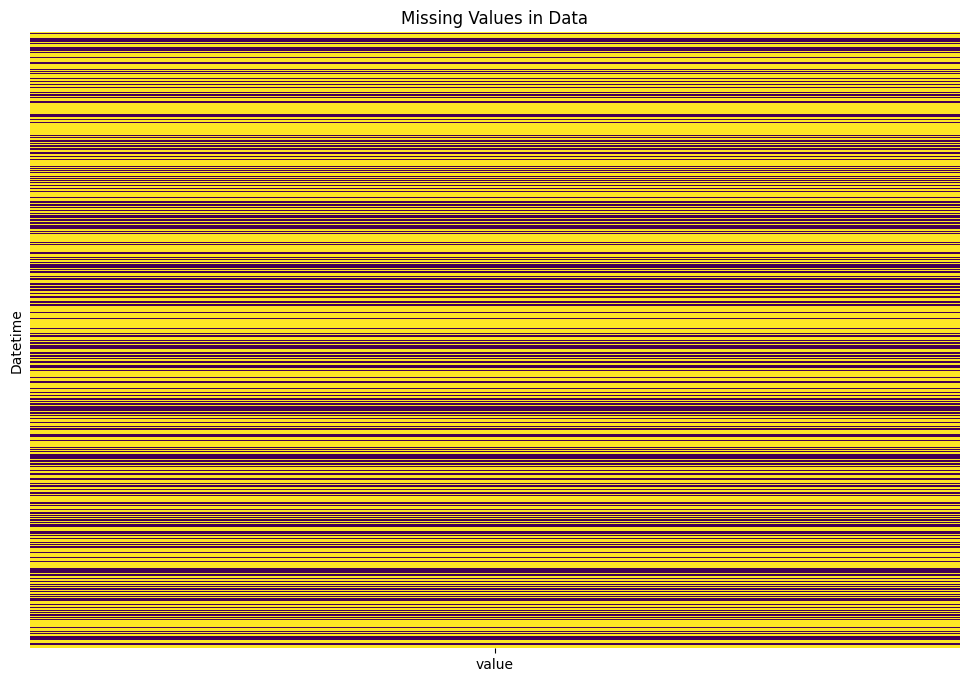

In [30]:
print("Missing Values:\n", df_sample_with_nan.isnull().sum())

# Visualize missing values
sns.heatmap(df_sample_with_nan.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Missing Values in Data")
plt.show()

In [31]:
# Imputation with mean value
avg_value = sample_with_nan.mean()
imp_mean = sample_with_nan.fillna(avg_value)
# imputation with last known observation
imp_ffill = sample_with_nan.ffill()
# imputation with next known observation
imp_bfill = sample_with_nan.bfill()

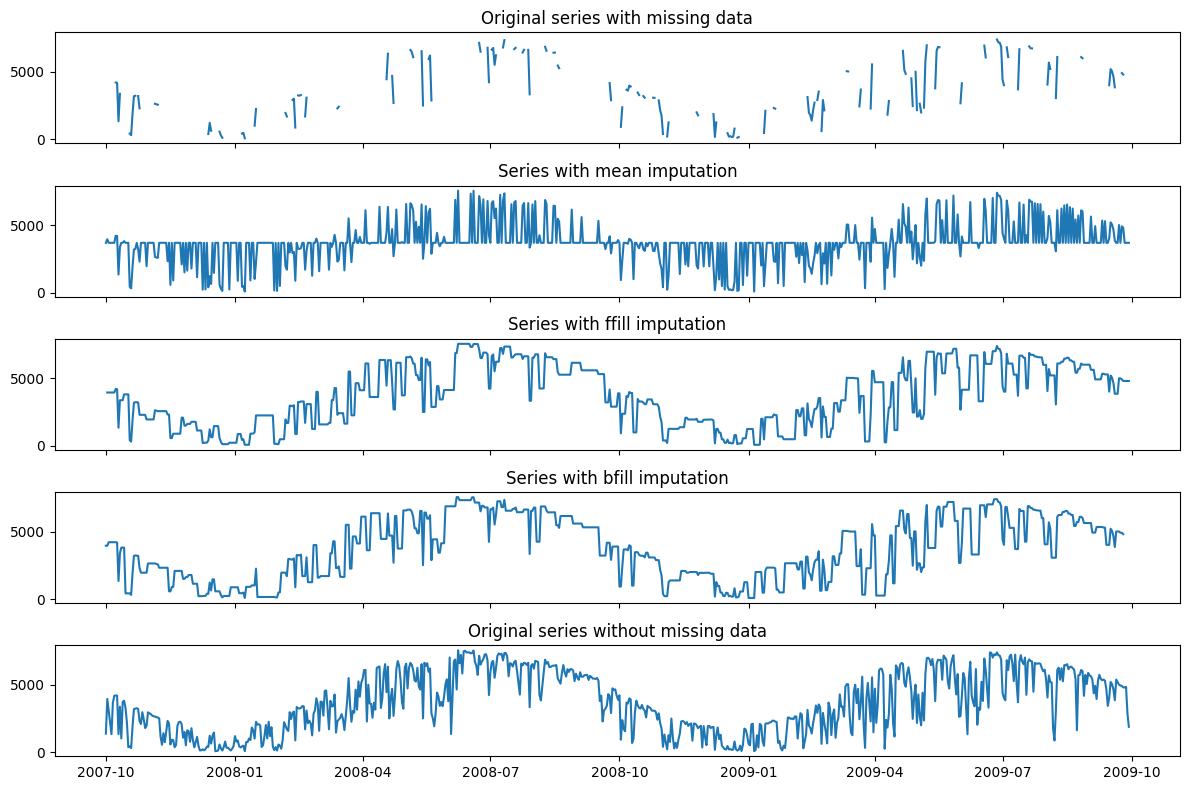

In [32]:
plt.rcParams['figure.figsize'] = [12, 8]

fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, sharex=True)
# fig.suptitle('Time series imputation methods')

ax0.plot(sample_with_nan)
ax0.set_title('Original series with missing data')
ax1.plot(imp_mean)
ax1.set_title('Series with mean imputation')
ax2.plot(imp_ffill)
ax2.set_title('Series with ffill imputation')
ax3.plot(imp_bfill)
ax3.set_title('Series with bfill imputation')
ax4.plot(series.head(365 * 2))
ax4.set_title('Original series without missing data')

plt.tight_layout()
plt.savefig("figures/Missing_data_comparison.png")

Which one is better

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
print('MSE mean imputation', np.nanmean((series.head(365 * 2)[idx] - imp_mean[idx])**2))
print('MSE ffill imputation', np.nanmean((series.head(365 * 2)[idx] - imp_ffill[idx])**2))
print('MSE bfill imputation', np.nanmean((series.head(365 * 2)[idx] - imp_bfill[idx])**2))

MSE mean imputation 4816781.474426566
MSE ffill imputation 2098420.2625400457
MSE bfill imputation 2274296.054124424


/var/folders/pn/vpqz4z_53xl4fpq_28c5mx700000gn/T/ipykernel_34547/1950638345.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('MSE mean imputation', np.nanmean((series.head(365 * 2)[idx] - imp_mean[idx])**2))
/var/folders/pn/vpqz4z_53xl4fpq_28c5mx700000gn/T/ipykernel_34547/1950638345.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('MSE ffill imputation', np.nanmean((series.head(365 * 2)[idx] - imp_ffill[idx])**2))
/var/folders/pn/vpqz4z_53xl4fpq_28c5mx700000gn/T/ipykernel_34547/1950638345.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer k

## Decomposing a time series

In [35]:
result = seasonal_decompose(x=series,
                            model='additive',
                            period=365)

Datetime
2007-10-01   NaN
2007-10-02   NaN
2007-10-03   NaN
2007-10-04   NaN
2007-10-05   NaN
              ..
2013-09-26   NaN
2013-09-27   NaN
2013-09-28   NaN
2013-09-29   NaN
2013-09-30   NaN
Freq: D, Name: resid, Length: 2192, dtype: float64

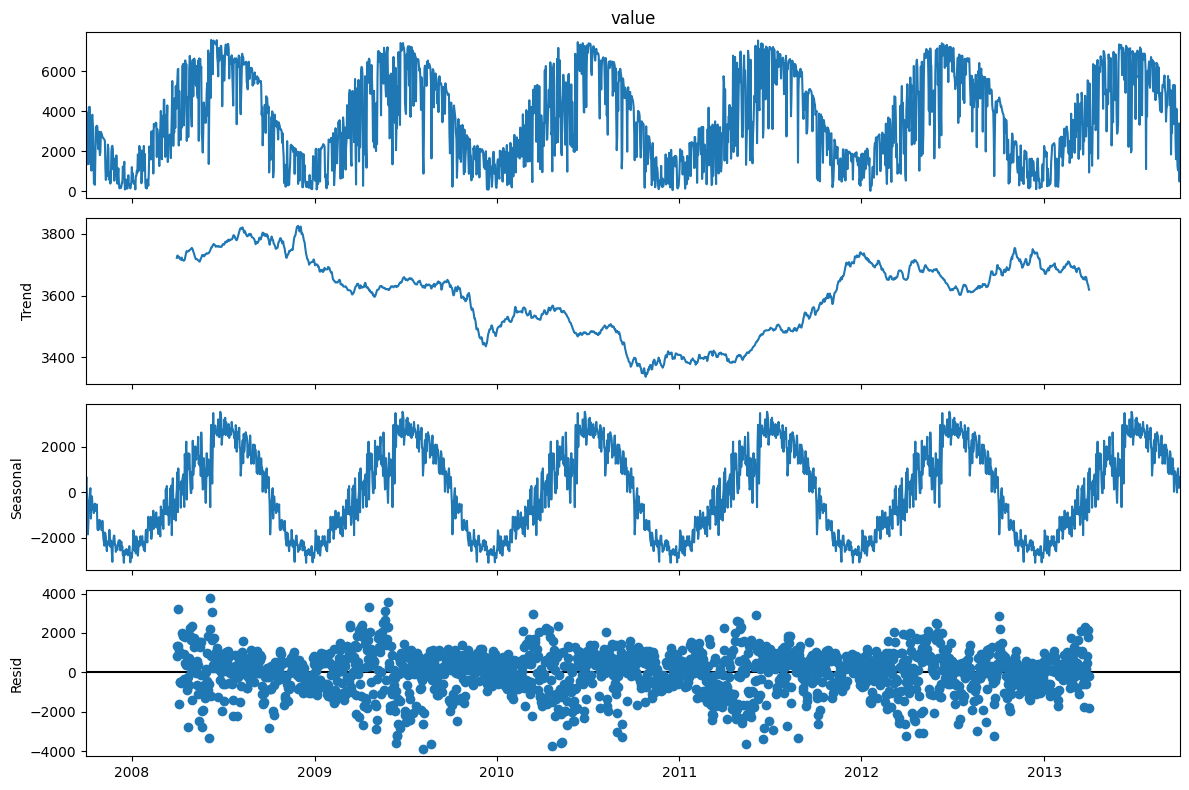

In [36]:
plot = result.plot()

plot.savefig('figures/classical_decomposition.png')

result.seasonal
result.trend
result.resid

In [37]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import MSTL


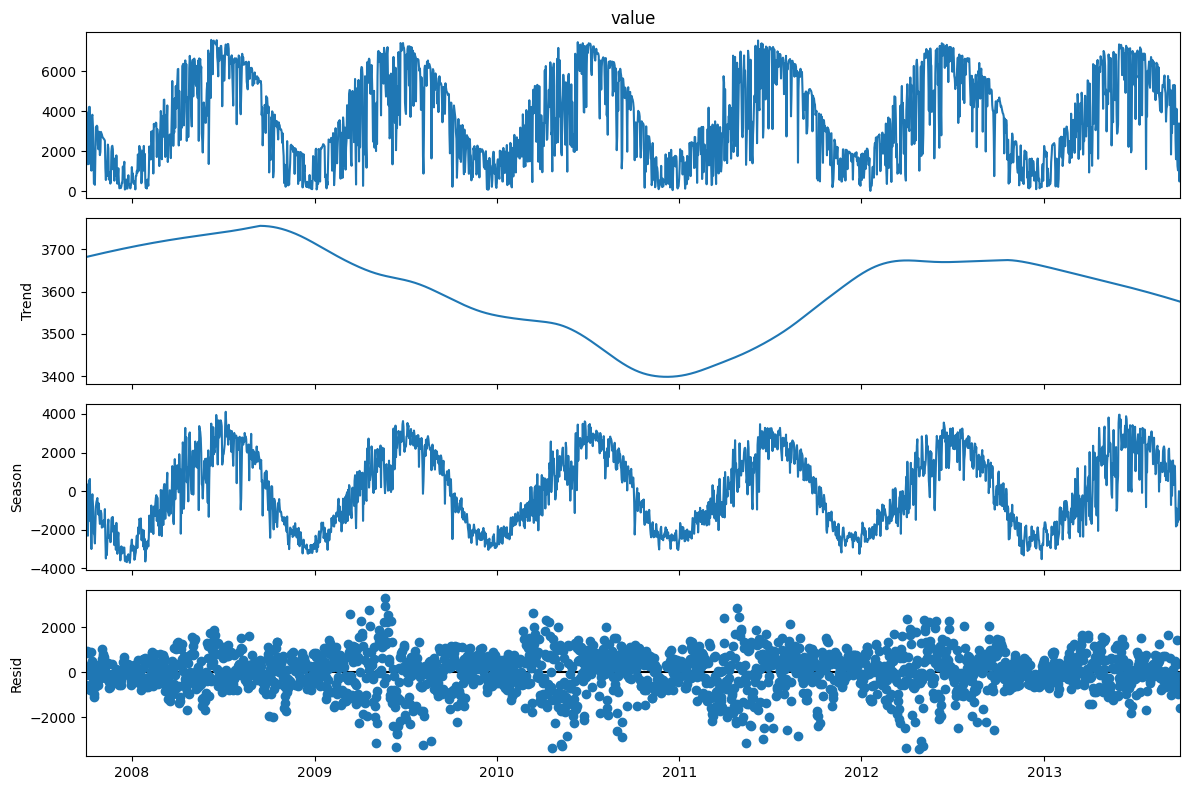

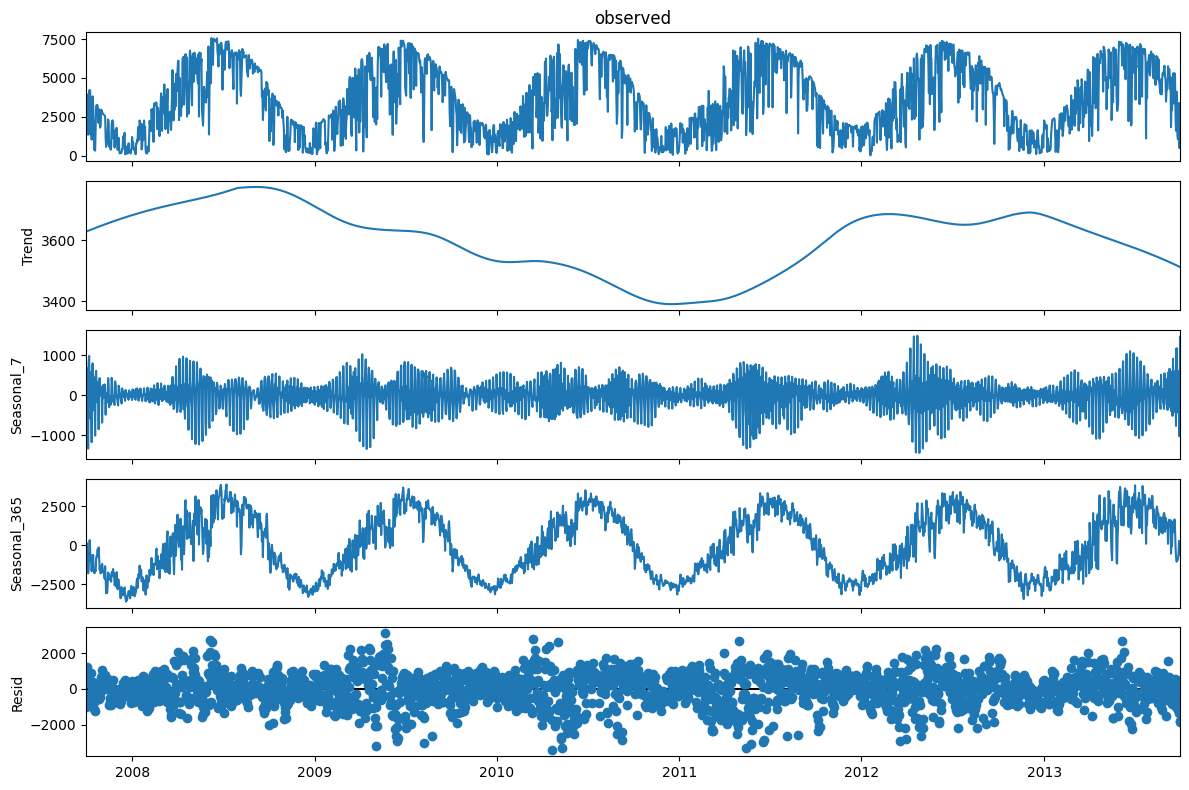

In [38]:
# STL
result = STL(endog=series, period=365).fit()
plot = result.plot()

# MSTL
result = MSTL(endog=series, periods=(7, 365)).fit()
plot = result.plot()


### Stationarity

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
result = adfuller(data['value'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -2.866737924730519
p-value: 0.04935490125604894


If the p-value is below a threshold (e.g., 0.05), we reject the null hypothesis, meaning the data is stationary.

In [41]:
from pmdarima.arima import ndiffs, nsdiffs

0

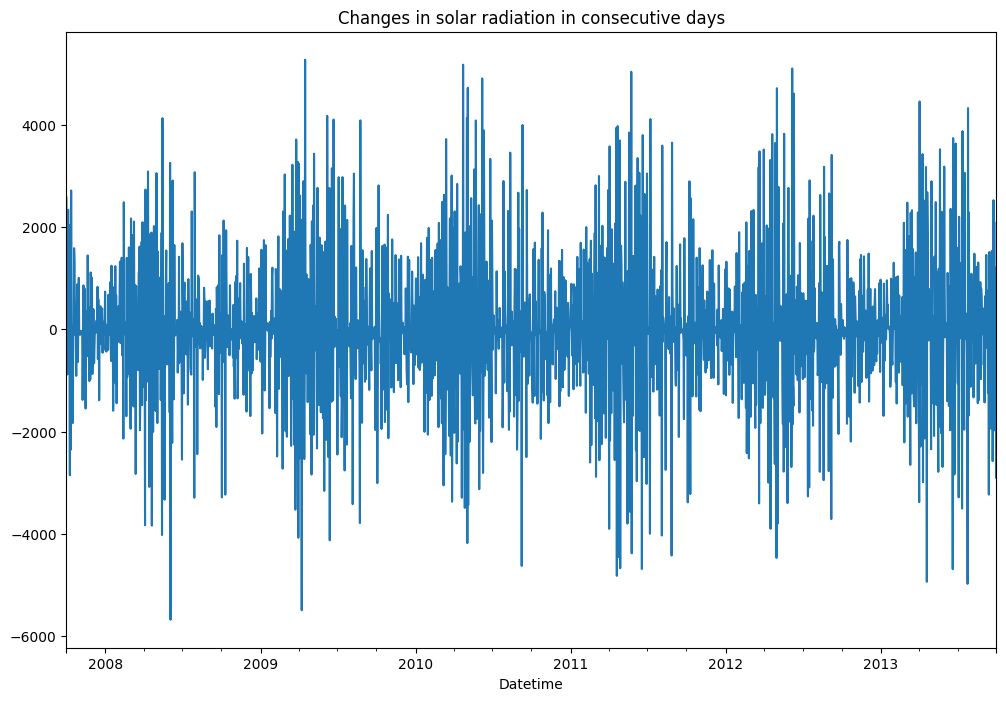

In [42]:
ndiffs(x=series, test='kpss')
ndiffs(x=series, test='adf')

series_changes = series.diff()[1:]
plt = series_changes.plot(title='Changes in solar radiation in consecutive days')

plt.figure.savefig('figures/uts_daily_changes.png')

nsdiffs(x=series_changes, test='ch', m=365)
nsdiffs(x=series_changes, test='ocsb', m=365)

## Heteroscedasticity

We can use the rolling standard deviation to observe variance changes over time.

In [43]:
import matplotlib.pyplot as plt

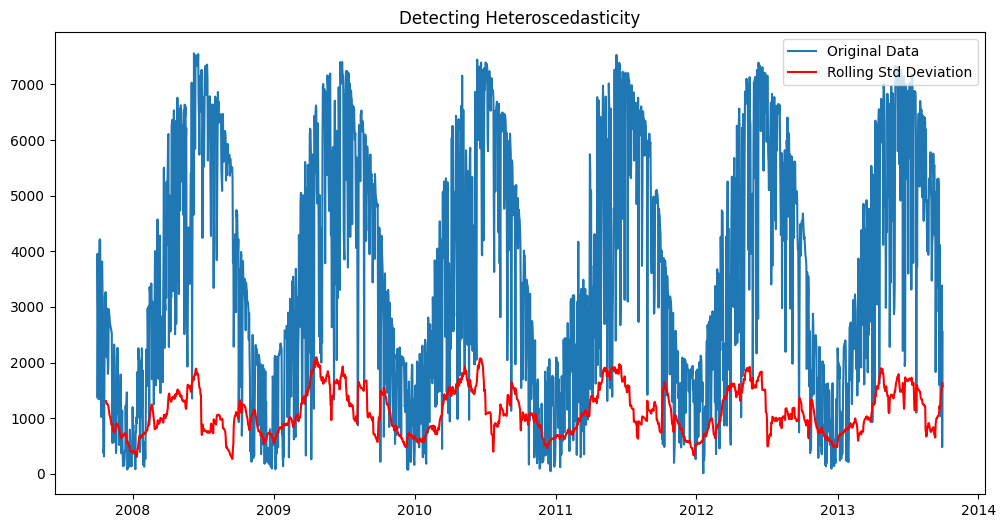

In [44]:
data['rolling_std'] = data['value'].rolling(window=24).std()

plt.figure(figsize=(12, 6))
plt.plot(data['value'], label='Original Data')
plt.plot(data['rolling_std'], color='red', label='Rolling Std Deviation')
plt.legend()
plt.title("Detecting Heteroscedasticity")
plt.savefig("figures/Heteroscedasticity.png")
plt.show()

## Autocorrelation and Seasonality

Use autocorrelation and partial autocorrelation plots to detect any temporal dependencies and seasonal patterns.

In [45]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

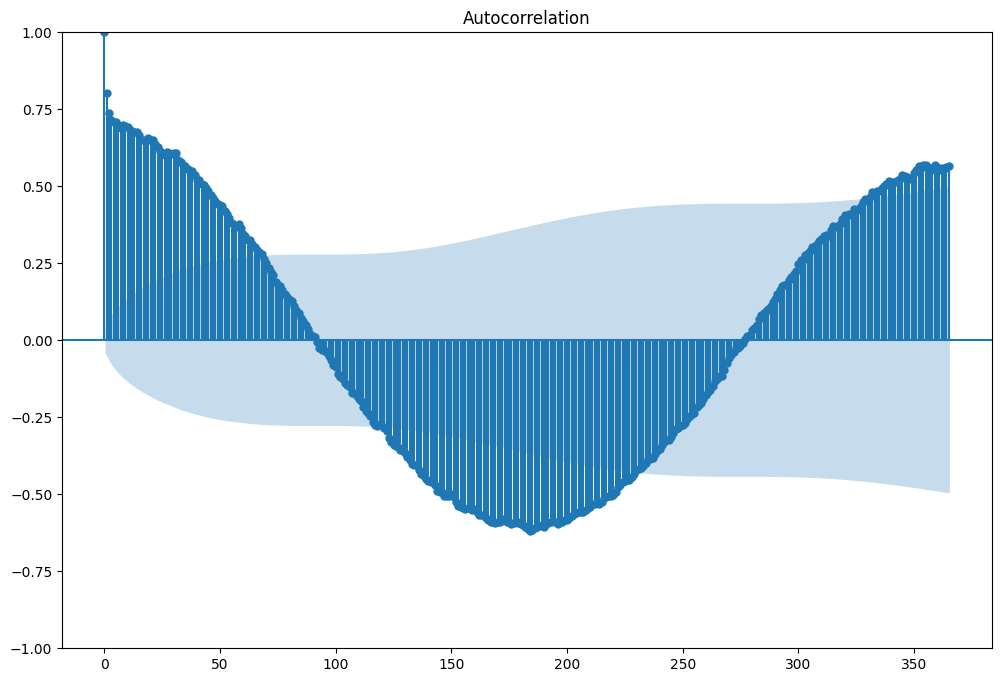

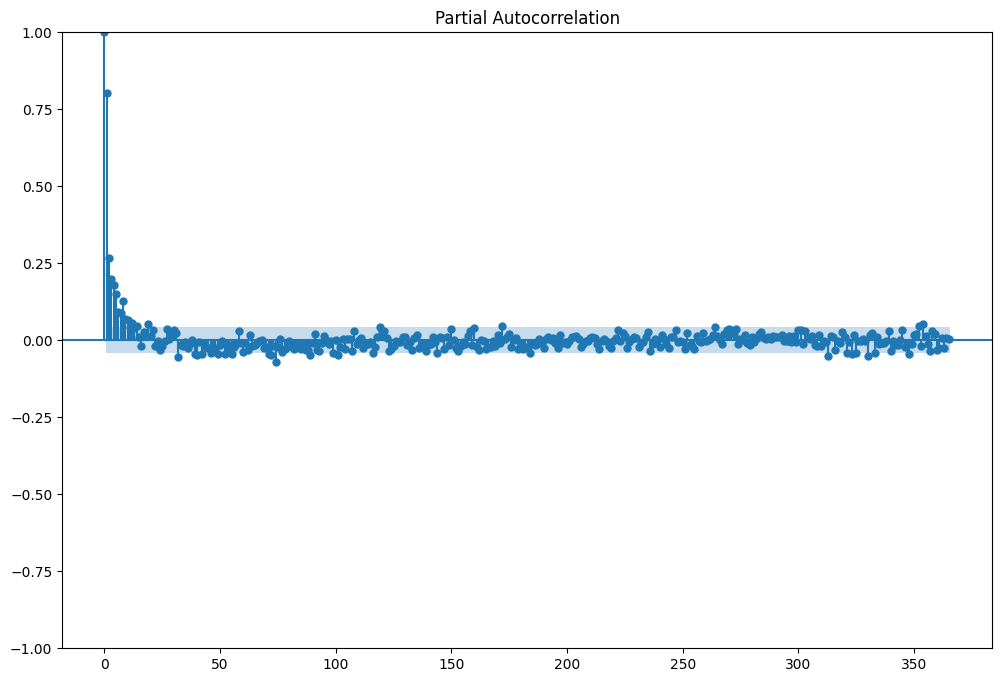

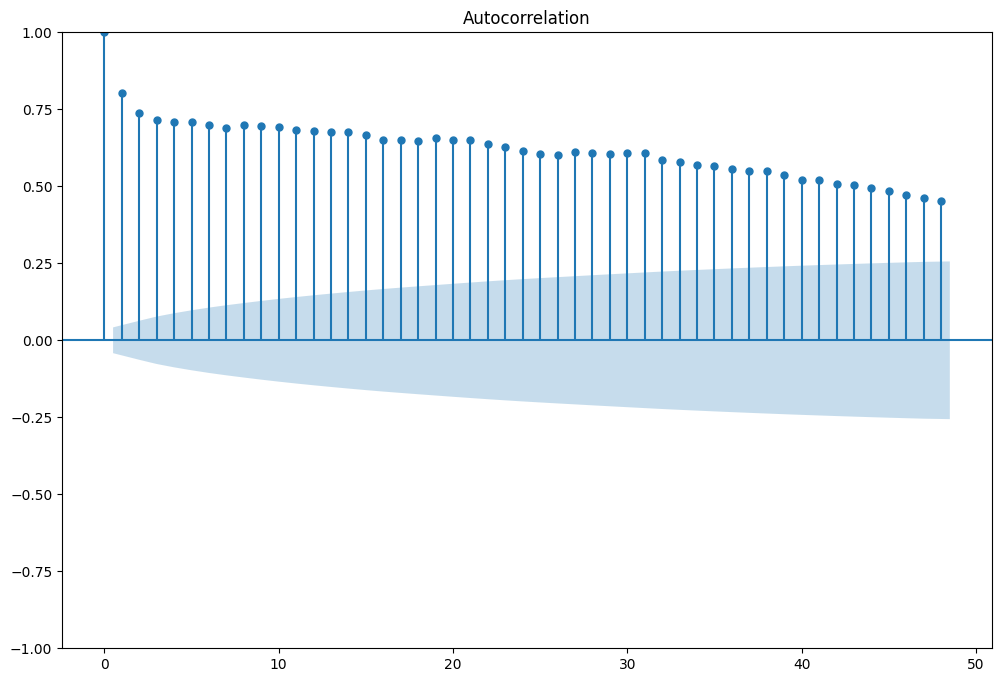

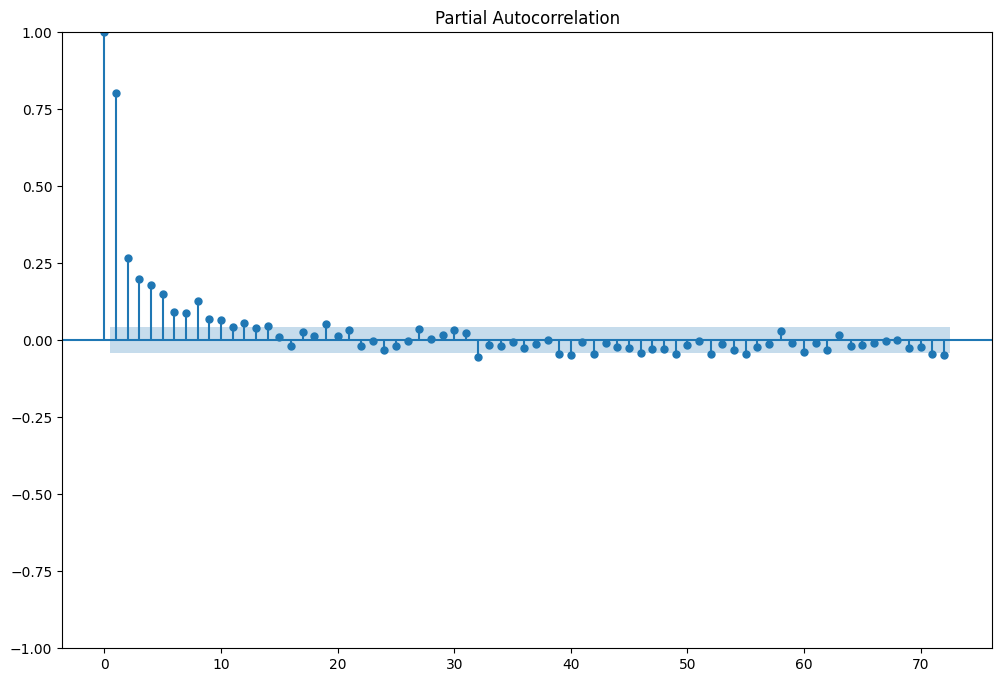

In [46]:
acf_scores = acf(x=series, nlags=365)
pacf_scores = pacf(x=series, nlags=365)

acf_plot_ = plot_acf(series, lags=365)
plt.savefig('figures/solar_acf.png')
pacf_plot_ = plot_pacf(series, lags=365)
plot = plot_acf(series, lags=48)
#plot = plot_acf(series, lags=365 * 24 * 2)
plot = plot_pacf(series, lags=72)
plt.savefig('figures/solar_pacf.png')

## Addressing Issues: Data Transformations

In [47]:
## Missing values
# Options include interpolation, forward/backward filling, or imputing based on nearby values.
data['value'] = data['value'].interpolate(method='linear')

## Transforming non-stationary data


Consider using differencing or applying a log transformation.

Differencing: Use differencing to remove trends.

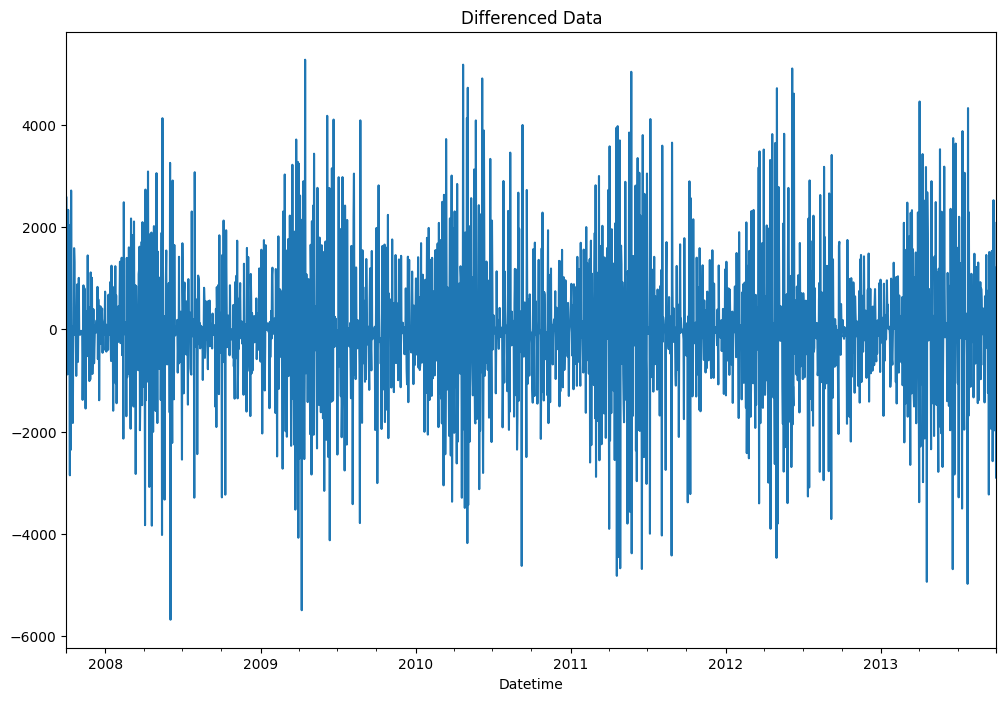

In [48]:
# Differencing
data['value_diff'] = data['value'] - data['value'].shift(1)
data['value_diff'].dropna().plot(title="Differenced Data")
plt.show()

Log Transformation: Useful if the data exhibits exponential growth or variance changes with time.

## Dealing with Heteroscedasticity

Consider using transformations like log-scaling or applying variance-stabilizing transformations.

In [49]:
# Log transformation for heteroscedasticity
data['value_log'] = np.log(data['value'])

If seasonality is strong, you can use seasonal decomposition to separate seasonal components from the data.

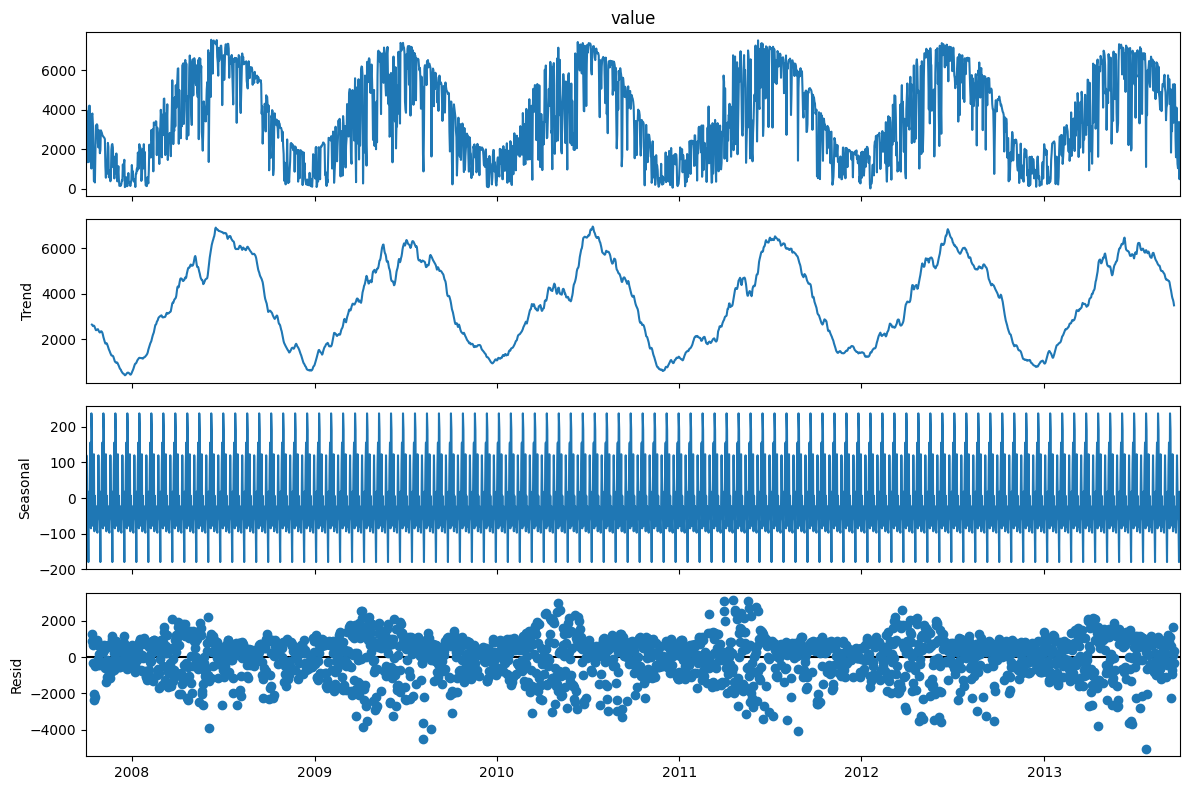

In [50]:

decompose_result = seasonal_decompose(data['value'], model='additive', period=24)
decompose_result.plot()
plt.show()

In [51]:
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

In [52]:
series_df = series.reset_index(drop=True).reset_index()
series_df.columns = ['time', 'value']
series_df['time'] += 1

olsr = ols('value ~ time', series_df).fit()

_, pval_white, _, _ = sms.het_white(olsr.resid, olsr.model.exog)
_, pval_bp, _, _ = sms.het_breuschpagan(olsr.resid, olsr.model.exog)

print(pval_white)
print(pval_bp)

0.2136045519279075
0.20630757319119034


In [53]:
# To deal with heteroscedasticity we can apply log-transformation
class LogTransformation:

    @staticmethod
    def transform(x):
        xt = np.sign(x) * np.log(np.abs(x) + 1)

        return xt

    @staticmethod
    def inverse_transform(xt):
        x = np.sign(xt) * (np.exp(np.abs(xt)) - 1)

        return x


In [54]:
from scipy import stats

In [55]:
series_log = LogTransformation.transform(series)

series_transformed, lmbda = stats.boxcox(series + 1)

series_transformed = pd.Series(series_transformed, index=series.index)

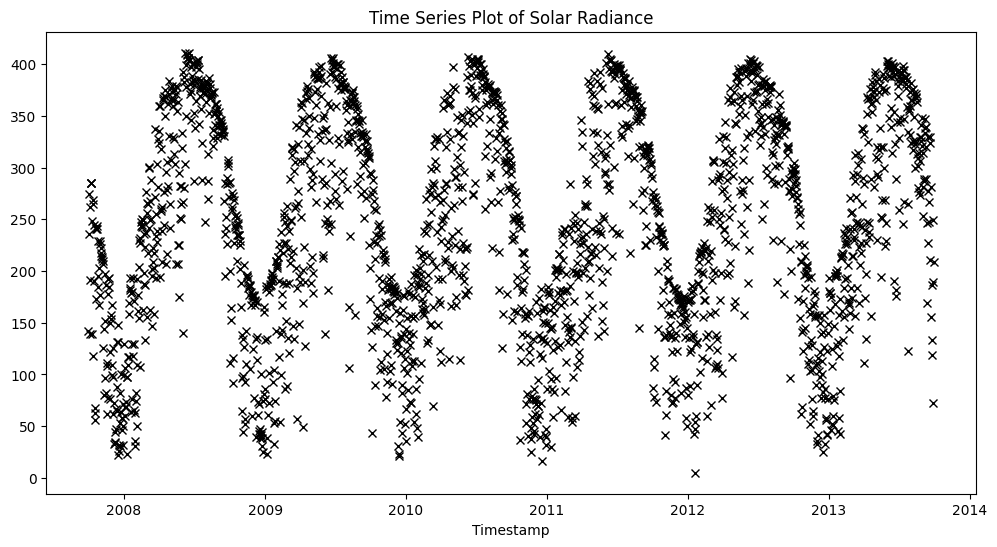

In [56]:
# Basic plot
plt.figure(figsize=(12, 6))
#plt.plot(data['value'],'kx')
plt.plot(series_transformed,'kx')
plt.title("Time Series Plot of Solar Radiance")
plt.xlabel("Timestamp")
plt.ylabel("")
plt.savefig('Solar_logtransformed.png')
plt.show()

In [57]:
df_transformed = pd.DataFrame(series_transformed)

In [58]:
df_transformed.columns = ['value']

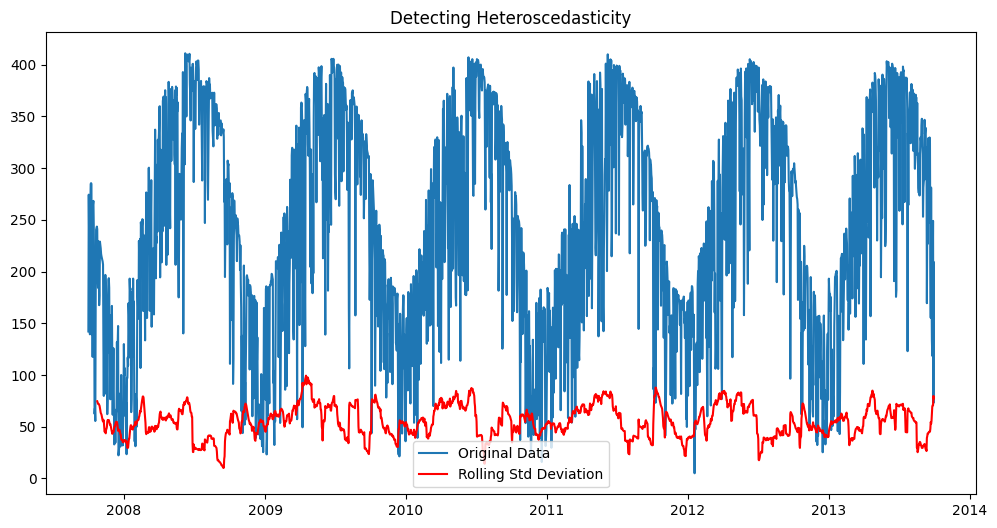

In [59]:
df_transformed['rolling_std'] = df_transformed['value'].rolling(window=24).std()

plt.figure(figsize=(12, 6))
plt.plot(df_transformed['value'], label='Original Data')
plt.plot(df_transformed['rolling_std'], color='red', label='Rolling Std Deviation')
plt.legend()
plt.title("Detecting Heteroscedasticity")
plt.savefig("figures/Heteroscedasticity_logtransformed.png")
plt.show()

## Choosing a Model Based on Data Characteristics
Based on the insights gathered during data exploration, here are general guidelines for model selection:

- Stationary Data without Seasonality: Consider using ARIMA models.

- Seasonal and Stationary Data: Use SARIMA or SARIMAX models.

- Non-stationary Data with Trends: LSTM models are beneficial for capturing long-term dependencies. LSTMs can model complex patterns and are good for non-stationary data where trends or seasonality persist.

- Heteroscedastic Data: Try GARCH models for time series with changing variance over time. GARCH is useful for financial time series or energy consumption with varying intensity.

- For data that does not adhere to a linear relationship, LSTM models can be a better choice than traditional models.